In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/kaggle/input/dev-comm-ml-recruitment/train.csv",parse_dates = ["acq_date"])
df

,id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,80378,-16.051,141.996,322.8,2.0,1.4,2019-12-03,1335,Terra,MODIS,100,6.0NRT,298.5,42.8,N
1,79962,-32.855,150.711,335.0,1.2,1.1,2019-12-03,405,Aqua,MODIS,84,6.0NRT,305.4,29.1,D
2,9680,-12.216,132.732,346.1,1.4,1.2,2019-10-12,435,Aqua,MODIS,90,6.0NRT,312.3,52.1,D
3,61999,-32.991,150.507,358.8,1.0,1.0,2019-11-19,350,Aqua,MODIS,99,6.0NRT,313.7,68.8,D
4,44632,-12.938,136.140,324.4,1.0,1.0,2019-11-10,1330,Terra,MODIS,100,6.0NRT,295.0,21.8,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,119880,-16.123,142.859,334.1,1.0,1.0,2019-12-19,410,Aqua,MODIS,69,6.0NRT,303.7,19.8,D
146870,103695,-16.616,142.347,354.4,1.3,1.1,2019-12-14,100,Terra,MODIS,96,6.0NRT,311.5,71.7,D
146871,131933,-24.957,149.431,326.7,1.8,1.3,2019-12-22,1225,Terra,MODIS,100,6.0NRT,298.0,50.1,N
146872,146868,-37.641,149.433,364.6,2.4,1.5,2019-12-29,2330,Terra,MODIS,100,6.0NRT,303.5,309.9,D


In [3]:
df_test= pd.read_csv("/kaggle/input/dev-comm-ml-recruitment/test.csv",parse_dates = ["acq_date"])
df_test

,id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,version,bright_t31,frp,daynight
0,1,-24.225,150.961,333.8,1.7,1.3,2019-12-18,320,Aqua,MODIS,6.0NRT,309.2,38.7,D
1,2,-31.417,151.815,330.8,1.0,1.0,2019-12-21,350,Aqua,MODIS,6.0NRT,309.8,17.2,D
2,3,-16.961,138.351,339.7,1.1,1.1,2019-12-17,420,Aqua,MODIS,6.0NRT,313.1,20.3,D
3,4,-33.443,150.172,319.6,1.0,1.0,2019-12-19,1505,Aqua,MODIS,6.0NRT,290.3,18.9,N
4,5,-36.970,147.286,347.6,1.0,1.0,2020-01-02,415,Aqua,MODIS,6.0NRT,303.4,54.9,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36714,36715,-16.933,143.232,336.1,1.4,1.2,2019-10-02,355,Aqua,MODIS,6.0NRT,315.7,19.5,D
36715,36716,-31.391,151.225,306.6,1.0,1.0,2019-12-18,1245,Terra,MODIS,6.0NRT,293.2,6.3,N
36716,36717,-36.244,147.678,390.9,1.0,1.0,2020-01-04,400,Aqua,MODIS,6.0NRT,329.9,182.7,D
36717,36718,-35.788,148.053,307.8,3.4,1.7,2020-01-03,1600,Aqua,MODIS,6.0NRT,293.5,48.9,N


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146874 entries, 0 to 146873
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id          146874 non-null  int64         
 1   latitude    146874 non-null  float64       
 2   longitude   146874 non-null  float64       
 3   brightness  146874 non-null  float64       
 4   scan        146874 non-null  float64       
 5   track       146874 non-null  float64       
 6   acq_date    146874 non-null  datetime64[ns]
 7   acq_time    146874 non-null  int64         
 8   satellite   146874 non-null  object        
 9   instrument  146874 non-null  object        
 10  confidence  146874 non-null  int64         
 11  version     146874 non-null  object        
 12  bright_t31  146874 non-null  float64       
 13  frp         146874 non-null  float64       
 14  daynight    146874 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(3), object(

In [5]:
df.satellite.unique()

array(['Terra', 'Aqua'], dtype=object)

In [6]:
df.daynight.unique()

array(['N', 'D'], dtype=object)

In [7]:
df.version.unique()

array(['6.0NRT'], dtype=object)

In [8]:
df.instrument.unique()

array(['MODIS'], dtype=object)

In [9]:
df.isna().sum()

id            0
latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
dtype: int64

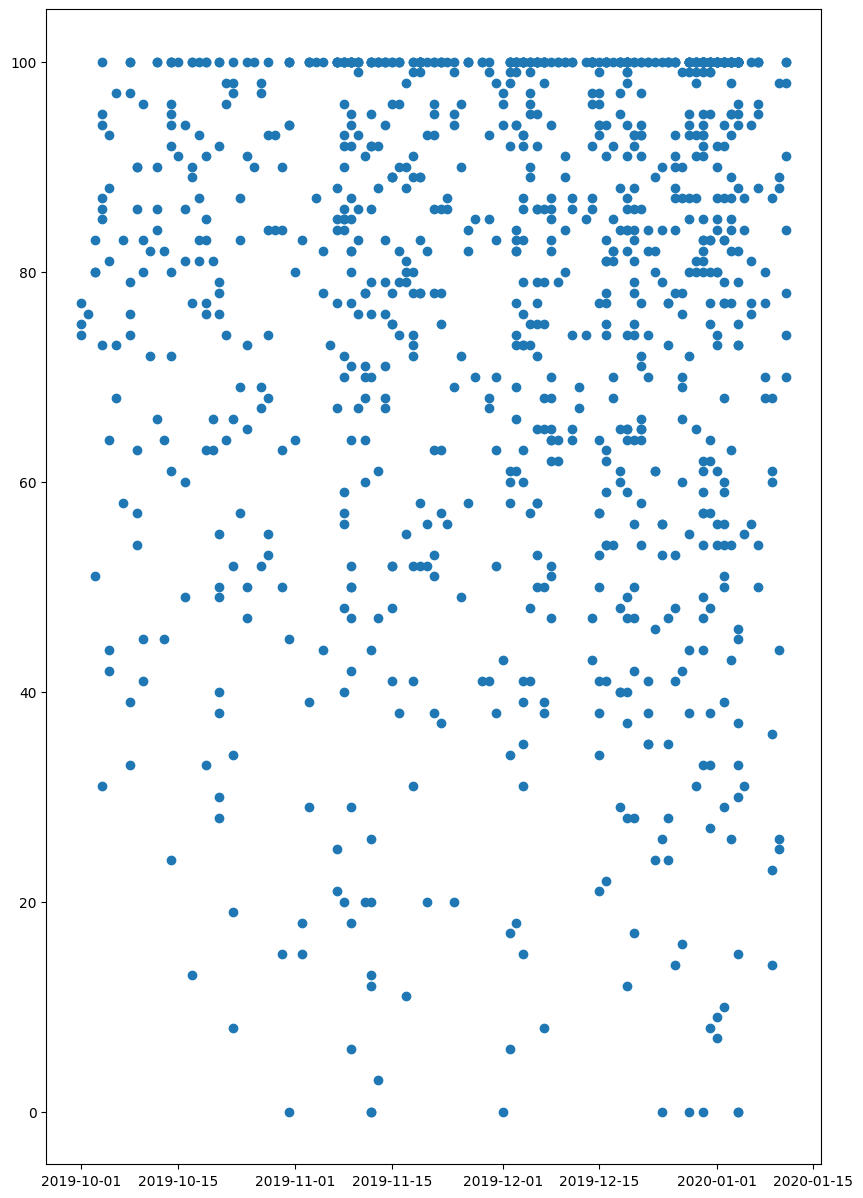

In [10]:
fig,ax = plt.subplots(figsize = (10,15))
ax.scatter(df.acq_date[:1000],df.confidence[:1000])

In [11]:
# Function to convert Dataframe dataset to numerical and adding additional data
def dataset_preprocessing(df):
    """
    This funtion will process the given dataframe to be able to fit in a machine learning model
    """
    df["acq_day"] = df["acq_date"].dt.day
    df["acq_month"] = df["acq_date"].dt.month
    df["acq_year"] = df["acq_date"].dt.year
    df["acq_day_of_week"] = df["acq_date"].dt.dayofweek
    df["acq_day_of_year"] = df["acq_date"].dt.dayofyear
    df["satellite"] = df["satellite"] == "Terra";
    df["daynight"] = df["daynight"] == "D";
    df["instrument"] = 1;
    df["version"] = 1;
    df.drop("acq_date",axis = 1,inplace = True);


In [12]:
df_tmp = df.copy();
dataset_preprocessing(df_tmp)


In [13]:
df

,id,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight
0,80378,-16.051,141.996,322.8,2.0,1.4,2019-12-03,1335,Terra,MODIS,100,6.0NRT,298.5,42.8,N
1,79962,-32.855,150.711,335.0,1.2,1.1,2019-12-03,405,Aqua,MODIS,84,6.0NRT,305.4,29.1,D
2,9680,-12.216,132.732,346.1,1.4,1.2,2019-10-12,435,Aqua,MODIS,90,6.0NRT,312.3,52.1,D
3,61999,-32.991,150.507,358.8,1.0,1.0,2019-11-19,350,Aqua,MODIS,99,6.0NRT,313.7,68.8,D
4,44632,-12.938,136.140,324.4,1.0,1.0,2019-11-10,1330,Terra,MODIS,100,6.0NRT,295.0,21.8,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,119880,-16.123,142.859,334.1,1.0,1.0,2019-12-19,410,Aqua,MODIS,69,6.0NRT,303.7,19.8,D
146870,103695,-16.616,142.347,354.4,1.3,1.1,2019-12-14,100,Terra,MODIS,96,6.0NRT,311.5,71.7,D
146871,131933,-24.957,149.431,326.7,1.8,1.3,2019-12-22,1225,Terra,MODIS,100,6.0NRT,298.0,50.1,N
146872,146868,-37.641,149.433,364.6,2.4,1.5,2019-12-29,2330,Terra,MODIS,100,6.0NRT,303.5,309.9,D


In [14]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146874 entries, 0 to 146873
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               146874 non-null  int64  
 1   latitude         146874 non-null  float64
 2   longitude        146874 non-null  float64
 3   brightness       146874 non-null  float64
 4   scan             146874 non-null  float64
 5   track            146874 non-null  float64
 6   acq_time         146874 non-null  int64  
 7   satellite        146874 non-null  bool   
 8   instrument       146874 non-null  int64  
 9   confidence       146874 non-null  int64  
 10  version          146874 non-null  int64  
 11  bright_t31       146874 non-null  float64
 12  frp              146874 non-null  float64
 13  daynight         146874 non-null  bool   
 14  acq_day          146874 non-null  int32  
 15  acq_month        146874 non-null  int32  
 16  acq_year         146874 non-null  int3

In [15]:
X = df_tmp.drop("confidence",axis = 1)
y = df_tmp["confidence"]

In [16]:
X

,id,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,version,bright_t31,frp,daynight,acq_day,acq_month,acq_year,acq_day_of_week,acq_day_of_year
0,80378,-16.051,141.996,322.8,2.0,1.4,1335,True,1,1,298.5,42.8,False,3,12,2019,1,337
1,79962,-32.855,150.711,335.0,1.2,1.1,405,False,1,1,305.4,29.1,True,3,12,2019,1,337
2,9680,-12.216,132.732,346.1,1.4,1.2,435,False,1,1,312.3,52.1,True,12,10,2019,5,285
3,61999,-32.991,150.507,358.8,1.0,1.0,350,False,1,1,313.7,68.8,True,19,11,2019,1,323
4,44632,-12.938,136.140,324.4,1.0,1.0,1330,True,1,1,295.0,21.8,False,10,11,2019,6,314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146869,119880,-16.123,142.859,334.1,1.0,1.0,410,False,1,1,303.7,19.8,True,19,12,2019,3,353
146870,103695,-16.616,142.347,354.4,1.3,1.1,100,True,1,1,311.5,71.7,True,14,12,2019,5,348
146871,131933,-24.957,149.431,326.7,1.8,1.3,1225,True,1,1,298.0,50.1,False,22,12,2019,6,356
146872,146868,-37.641,149.433,364.6,2.4,1.5,2330,True,1,1,303.5,309.9,True,29,12,2019,6,363


In [17]:
y

0         100
1          84
2          90
3          99
4         100
         ... 
146869     69
146870     96
146871    100
146872    100
146873     80
Name: confidence, Length: 146874, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
np.random.seed(69)

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.2)

In [19]:
# Fitting the data into RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
model = RandomForestRegressor(n_estimators = 1000)

model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=1000)

In [20]:
y_pred = model.predict(X_test)

In [21]:
from sklearn.metrics import r2_score
score = r2_score(y_true = y_test,y_pred = y_pred.astype('i') )
score

0.6418958999620324

In [22]:
# Changing test dataframe
dataset_preprocessing(df_test)

In [23]:
df_test

,id,latitude,longitude,brightness,scan,track,acq_time,satellite,instrument,version,bright_t31,frp,daynight,acq_day,acq_month,acq_year,acq_day_of_week,acq_day_of_year
0,1,-24.225,150.961,333.8,1.7,1.3,320,False,1,1,309.2,38.7,True,18,12,2019,2,352
1,2,-31.417,151.815,330.8,1.0,1.0,350,False,1,1,309.8,17.2,True,21,12,2019,5,355
2,3,-16.961,138.351,339.7,1.1,1.1,420,False,1,1,313.1,20.3,True,17,12,2019,1,351
3,4,-33.443,150.172,319.6,1.0,1.0,1505,False,1,1,290.3,18.9,False,19,12,2019,3,353
4,5,-36.970,147.286,347.6,1.0,1.0,415,False,1,1,303.4,54.9,True,2,1,2020,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36714,36715,-16.933,143.232,336.1,1.4,1.2,355,False,1,1,315.7,19.5,True,2,10,2019,2,275
36715,36716,-31.391,151.225,306.6,1.0,1.0,1245,True,1,1,293.2,6.3,False,18,12,2019,2,352
36716,36717,-36.244,147.678,390.9,1.0,1.0,400,False,1,1,329.9,182.7,True,4,1,2020,5,4
36717,36718,-35.788,148.053,307.8,3.4,1.7,1600,False,1,1,293.5,48.9,False,3,1,2020,4,3


In [24]:
prediction = model.predict(df_test).astype('i')
prediction

array([64, 58, 69, ..., 99, 48, 88], dtype=int32)

In [25]:
output = pd.DataFrame({'id': df_test.id, 'confidence': prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
